In [17]:
#!pip install plotly
#import plotly
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

In [7]:
#!pip install pydot
#!pip install graphviz
#!pip install pydot-ng

In [45]:
class node:
    def __init__(self,key='',item=''):
        self.left = None
        self.right = None
        self.parent = None 
        self.key = key
        self.item = item
        
class entry:
    def __init__(self,key='',item=''):
        self.key = key
        self.item = item
        
class binarySearchTree:
    def __init__(self):
        self.root = None
        self.entries = []
            
    def getentries(self,root):
        if root:
            self.getentries(root.left)
            self.entries.append(entry(key=root.key,item=root.item))
            self.getentries(root.right)
        
    def balance(self):
        self.entries = []
        self.getentries(self.root)
        self.root = None
        self.construct(self.entries)
        
    def construct(self,entries):
        if self.root is None:
            entries = sorted(entries, key=lambda x:x.key)
        if len(entries)<=2:
            for e in entries:
                self.push(e)
            return
        else:
            self.push(entries[len(entries)//2])
            self.construct(entries[:len(entries)//2])
            self.construct(entries[len(entries)//2+1:])
    
    def insert(self,root,entry):
        if root is None:
            root = node(key=entry.key,item=entry.item)
        else:
            if entry.key == root.key:
                root.item = entry.item
            elif entry.key < root.key:
                root.left = self.insert(root.left,entry)
                root.left.parent = root
            else:
                root.right = self.insert(root.right,entry)
                root.right.parent = root
        return root
    
    def push(self,entry):
        self.root = self.insert(self.root,entry)
        
    def min(self,root):
        node = root
        while node.left is not None:
            node = node.left
        return node
    
    def max(self,root):
        node = root
        while node.right is not None:
            node = node.right
        return node
    
    def inorder(self,root):
        if root:
            self.inorder(root.left)
            print(root.key)
            self.inorder(root.right)
    
    def height(self,node):
        if node is None:
            return 0
        else:
            lheight = self.height(node.left)
            rheight = self.height(node.right)
 
            if lheight > rheight:
                return lheight+1
            else:
                return rheight+1
    
    def printLevelOrder(self):
        h = self.height(self.root)
        for i in range(1, h+1):
            self.printCurrentLevel(self.root, i)
 
 
    def printCurrentLevel(self,root,level):
        if root is None:
            return
        if level == 1:
            print(root.key,end=" ")
        elif level > 1:
            self.printCurrentLevel(root.left,level-1)
            self.printCurrentLevel(root.right,level-1)
            
    def delete(self,key=None,root=None):
        if key is not None:
            node = self.getnode(self.root,key)
            if node is None: return
        else:
            node = root            
        if node.left is None and node.right is None:
            if node.key > node.parent.key:
                node.parent.right = None
            else:
                node.parent.left = None
        elif node.left is None:
            node.key = node.right.key
            node.item = node.right.item
            node.right = None
        elif node.right is None:
            node.key = node.left.key
            node.item = node.left.item
            node.left = None
        else:
            n2 = self.predecessor(root=node,key=node.key)
            self.swap(node,n2)
            self.delete(root=n2)
            
    
    def predecessor(self,root=None,prec=None,key=None):

        if root is None:
            return None

        if root.key == key:
            if root.left:
                return self.max(root.left)

        elif key < root.key:
            return self.predecessor(root.left, prec, key)

        else:
            prec = root
            return self.predecessor(root.right, prec, key)
 
        return prec

    def successor(self,root=None,suc=None,key=None):

        if root is None:
            return None

        if root.key == key:
            if root.right:
                return self.min(root.right)

        elif key > root.key:
            return self.successor(root.right, suc, key)

        else:
            suc = root
            return self.successor(root.left, suc, key)
 
        return suc
    
    def getnode(self,root,key):
        if key == root.key:
            return root
        elif key < root.key:
            if root.left is not None:
                return self.getnode(root.left,key)
            else:
                return None
        else:
            if root.right is not None:
                return self.getnode(root.right,key)
            else:
                return None
    
    def swap(self,n1,n2):
        e1 = entry(item=n1.item,key=n1.key)
        e2 = entry(item=n2.item,key=n2.key)
        n1.item = e2.item
        n1.key = e2.key
        n2.item = e1.item
        n2.key = e1.key


In [46]:
arr = [8,12,5,3,2,4,7,6,10,9,11,17,13]
arr = [entry(key=a) for a in arr]

In [47]:
#arr = sorted(arr, key=lambda x: x.key)

In [48]:
tree = binarySearchTree()    

In [49]:
tree.construct(arr)

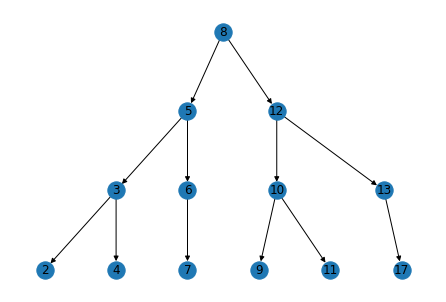

In [50]:
g = nx.DiGraph()
def traverse(node):
    if node:
        traverse(node.left)
        if node.parent:
            g.add_edge(node.parent.key,node.key)
        traverse(node.right)
traverse(tree.root)   
pos = graphviz_layout(g, prog="dot")
nx.draw(g, pos, with_labels=True)
plt.show()

In [52]:
tree.push(entry(key=27))

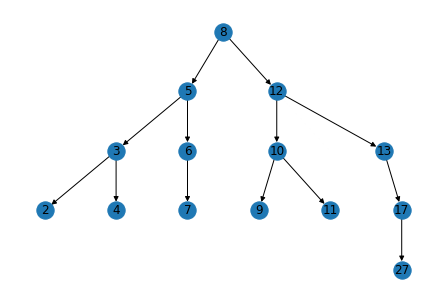

In [53]:
g = nx.DiGraph()
def traverse(node):
    if node:
        traverse(node.left)
        if node.parent:
            g.add_edge(node.parent.key,node.key)
        traverse(node.right)
traverse(tree.root)   
pos = graphviz_layout(g, prog="dot")
nx.draw(g, pos, with_labels=True)
plt.show()

In [54]:
tree.balance()

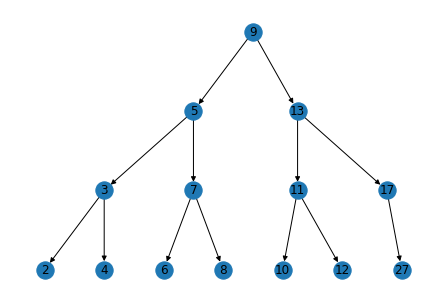

In [55]:
g = nx.DiGraph()
def traverse(node):
    if node:
        traverse(node.left)
        if node.parent:
            g.add_edge(node.parent.key,node.key)
        traverse(node.right)
traverse(tree.root)   
pos = graphviz_layout(g, prog="dot")
nx.draw(g, pos, with_labels=True)
plt.show()

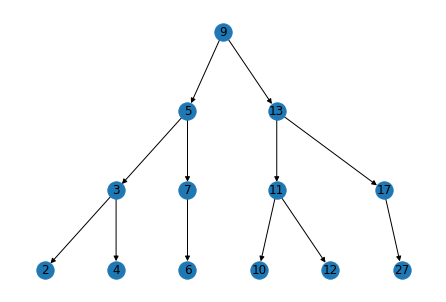

In [56]:
tree.delete(8)

g = nx.DiGraph()
def traverse(node):
    if node:
        traverse(node.left)
        if node.parent:
            g.add_edge(node.parent.key,node.key)
        traverse(node.right)
traverse(tree.root)
pos = graphviz_layout(g, prog="dot")
nx.draw(g, pos, with_labels=True)
plt.show()

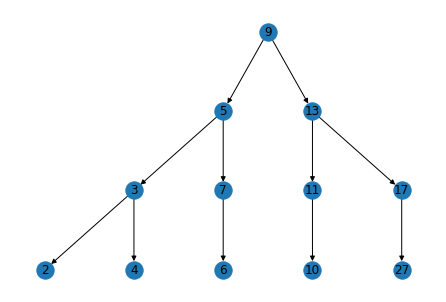

In [57]:
tree.delete(12)

g = nx.DiGraph()
def traverse(node):
    if node:
        traverse(node.left)
        if node.parent:
            g.add_edge(node.parent.key,node.key)
        traverse(node.right)
traverse(tree.root)
pos = graphviz_layout(g, prog="dot")
nx.draw(g, pos, with_labels=True)
plt.show()

In [59]:
tree.push(entry(key=16))

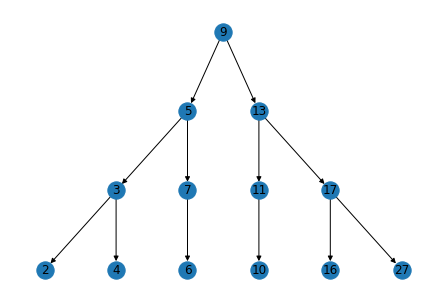

In [60]:
g = nx.DiGraph()
def traverse(node):
    if node:
        traverse(node.left)
        if node.parent:
            g.add_edge(node.parent.key,node.key)
        traverse(node.right)
traverse(tree.root)
pos = graphviz_layout(g, prog="dot")
nx.draw(g, pos, with_labels=True)
plt.show()